# Count Vectorization(BOW)

### Load Dependencies

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import wordnet

### Initial Setup

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))  # go to project root

### Load Dataset

In [3]:
data = pd.read_csv(r"..\dataset\processed\clean_dataset.csv", sep=",")
df =data.copy()

df.head()

,news_headline,label
0,donald trump sends embarrass new year eve mess...,0
1,drunk brag trump staffer start russian collusi...,0
2,sheriff david clarke become internet joke thre...,0
3,trump obsess even obama name cod website image,0
4,pope francis call donald trump christmas speech,0


In [4]:
df.shape

(34143, 2)

In [5]:
pd.set_option('display.max_colwidth', 100)
df.sample(5)

,news_headline,label
20427,trump say discuss form cyber security unit putin,1
29726,spd agree talk join german government merkel urge quick action,1
1447,white house defend trump admit idiot,0
3950,cnn host stun trump advisor deny evidence assault allegation video,0
4691,trump get humiliated new york lawmaker false claim,0


### Separate Label & Text

In [6]:
# Split the dataset

# Features & Target
X = df['news_headline']           
y = df['label']            
X.sample(10)

22307                                  deal yet healthcare bill house freedom caucus chairman say
33426                    malaysian state royal council urge sedition probe former leader mahathir
17098    flashback wapo headline obama fire john brennan lie one year jam clapper caught lie oath
28509                               trading algorithm show mass shooting politics boost gun share
3820                                                          stupid trump fan think popular vote
5031                                trump want impose ideological litmus test immigrant even pass
6102                            los angeles time endorse hillary clinton ahead california primary
29936                       peru prosecutor probe allege abuse seek jail catholic society founder
1411                                         gop senator say flynn stonewall russia investigation
20210                              trump administration nafta demand make sense union pacific ceo
Name: news_headline,

### Split Dataset

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (27314,)
X_test size: (6829,)
y_train size: (27314,)
y_test size: (6829,)


In [8]:
# Check for class imbalancement
y_train.value_counts()

label
0    14050
1    13264
Name: count, dtype: int64

In [9]:
from src.vectorize import get_vectorize

_ , feature_names, X_train_vec, X_test_vec = get_vectorize(X_train, X_test, method='bow', ngram_range= (1,1), min_df= 10 , max_df= 1.0, max_features=10000)

print(len(feature_names))

I am Vectorizer using Bag of Words
Vectorization completed
Train shape: (27314, 3185)
Test shape : (6829, 3185)
3185


In [10]:
X_train_vec[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 3185))

In [11]:
first_doc = X_train_vec[0].toarray()[0]

for word, count in zip(feature_names, first_doc):
    if count > 0:
        print(word, count)

give 1
list 1
magazine 1
make 1
people 1
person 1
president 1
review 1
stun 1
time 1
trump 1
world 1


### CountVectorizer(BOW) Experiments

In [ ]:
from utils.vectorizeBOW import *
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [13]:
# Create a empty DataFrame 
# This will store all experiment results

metrics_df = pd.DataFrame()

# Define Model List to Experiment
models = [
    LogisticRegression(), 
    LinearSVC(), 
    MultinomialNB(), 
    RandomForestClassifier(n_estimators= 500, max_depth= 10), 
    XGBClassifier(n_estimators= 500, max_depth= 10)
]
# Define parameters for experimentation
# ngram_vals:
# (1,1) → Only unigrams (single words)
# (1,2) → Unigrams + bigrams
# (1,3) → Unigrams + bigrams + trigrams
# (2,2) → Only bigrams
# Used to control the size and type of word combinations the vectorizer creates.
ngram_vals = [(1, 1), (1, 2), (1, 3), (2, 2)]

# min_df_vals:
# Minimum document frequency threshold.
# A word must appear in at least this many documents to be kept.
# Example:
# min_df=10 → ignore words that appear in fewer than 10 documents.
# Helps remove rare/noisy words.
min_df_vals = [1, 5, 10, 20]

# max_df_vals:
# Maximum document frequency threshold.
# Removes very common words that appear in too many documents.
# Example:
# max_df=0.95 → ignore words that appear in more than 95% of documents.
# Helps remove overly frequent, non-informative words.
max_df_vals = [0.90, 0.95, 0.99]

# Calculate total configs.
total_configs = len(models)*len(ngram_vals)*len(min_df_vals)*len(max_df_vals)
print("Tatal Configurations:", total_configs)

# Configs per model
config_per_model = int(total_configs/len(models))
print("Configs per Model:", config_per_model)

Tatal Configurations: 240
Configs per Model: 48


In [14]:
import itertools
import time
from tqdm import tqdm

# Create full parameter grid
param_grid = list(itertools.product(models, ngram_vals, min_df_vals, max_df_vals))

total_experiments = len(param_grid)
print(f"Total Experiments: {total_experiments}")

results = []
start_time = time.time()

for idx, (model, n, m, j) in enumerate(tqdm(param_grid), 1):

    row = run_bow_experiment(
        model=model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        ngram_range=n,
        min_df=m,
        max_df=j,
        comments=f"ngram={n}, min_df={m}, max_df={j}"
    )

    results.append(row)

    metrics_df = pd.DataFrame(results)

    end_time = time.time()
print(f"Finished in {(end_time - start_time)/60:.2f} minutes")

Total Experiments: 240


100%|██████████| 240/240 [05:29<00:00,  1.37s/it]

Finished in 5.48 minutes


In [15]:
metrics_df.head()

,model,method,ngram_range,min_df,max_df,max_feature,features_limit,train_acc,test_acc,f1_train,f1_test,gap_percent,comments
0,LogisticRegression,countVectorizer,"(1, 1)",1,0.90,5000,5000,0.9624,0.9288,0.9615,0.9280,3.35,"ngram=(1, 1), min_df=1, max_df=0.9"
1,LogisticRegression,countVectorizer,"(1, 1)",1,0.95,5000,5000,0.9624,0.9288,0.9615,0.9280,3.35,"ngram=(1, 1), min_df=1, max_df=0.95"
2,LogisticRegression,countVectorizer,"(1, 1)",1,0.99,5000,5000,0.9624,0.9288,0.9615,0.9280,3.35,"ngram=(1, 1), min_df=1, max_df=0.99"
3,LogisticRegression,countVectorizer,"(1, 1)",5,0.90,4888,5000,0.9627,0.9280,0.9618,0.9271,3.48,"ngram=(1, 1), min_df=5, max_df=0.9"
4,LogisticRegression,countVectorizer,"(1, 1)",5,0.95,4888,5000,0.9627,0.9280,0.9618,0.9271,3.48,"ngram=(1, 1), min_df=5, max_df=0.95"


In [29]:
metrics_df.sort_values(by= 'f1_test', ascending= False).groupby('model').head(1). reset_index(drop='index')

,model,method,ngram_range,min_df,max_df,max_feature,features_limit,train_acc,test_acc,f1_train,f1_test,gap_percent,comments
0,LogisticRegression,countVectorizer,"(1, 2)",1,0.99,5000,5000,0.9638,0.9291,0.9630,0.9283,3.47,"ngram=(1, 2), min_df=1, max_df=0.99"
1,XGBClassifier,countVectorizer,"(1, 2)",5,0.95,5000,5000,0.9661,0.9262,0.9654,0.9253,4.02,"ngram=(1, 2), min_df=5, max_df=0.95"
2,LinearSVC,countVectorizer,"(1, 2)",5,0.99,5000,5000,0.9821,0.9212,0.9817,0.9197,6.20,"ngram=(1, 2), min_df=5, max_df=0.99"
3,MultinomialNB,countVectorizer,"(1, 1)",5,0.99,4888,5000,0.9355,0.9205,0.9333,0.9179,1.55,"ngram=(1, 1), min_df=5, max_df=0.99"
4,RandomForestClassifier,countVectorizer,"(1, 1)",5,0.99,4888,5000,0.8748,0.8625,0.8757,0.8631,1.26,"ngram=(1, 1), min_df=5, max_df=0.99"


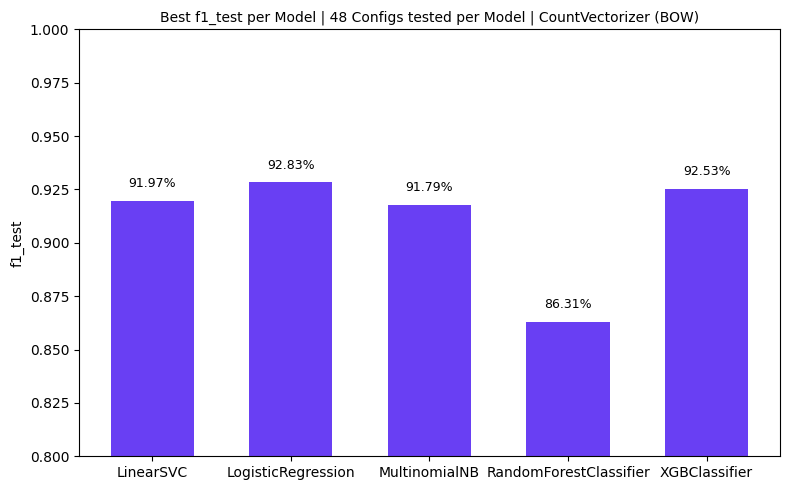

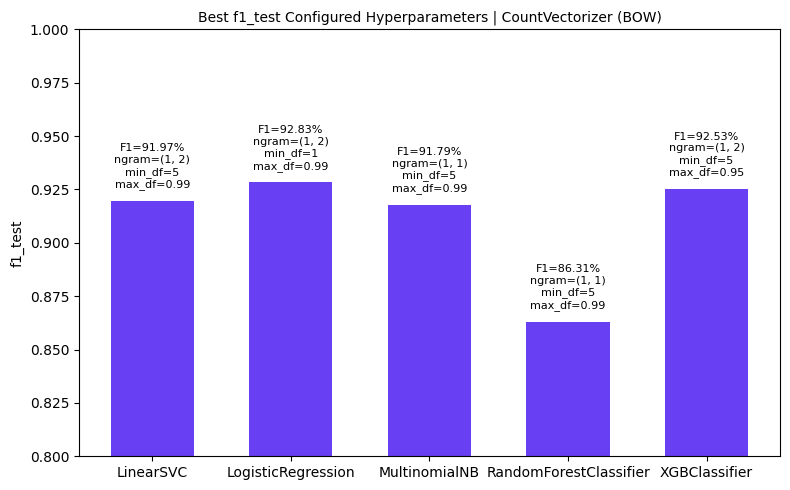

,model,method,ngram_range,min_df,max_df,max_feature,features_limit,train_acc,test_acc,f1_train,f1_test,gap_percent,comments
0,LinearSVC,countVectorizer,"(1, 2)",5,0.99,5000,5000,0.9821,0.9212,0.9817,0.9197,6.20,"ngram=(1, 2), min_df=5, max_df=0.99"
1,LogisticRegression,countVectorizer,"(1, 2)",1,0.99,5000,5000,0.9638,0.9291,0.9630,0.9283,3.47,"ngram=(1, 2), min_df=1, max_df=0.99"
2,MultinomialNB,countVectorizer,"(1, 1)",5,0.99,4888,5000,0.9355,0.9205,0.9333,0.9179,1.55,"ngram=(1, 1), min_df=5, max_df=0.99"
3,RandomForestClassifier,countVectorizer,"(1, 1)",5,0.99,4888,5000,0.8748,0.8625,0.8757,0.8631,1.26,"ngram=(1, 1), min_df=5, max_df=0.99"
4,XGBClassifier,countVectorizer,"(1, 2)",5,0.95,5000,5000,0.9661,0.9262,0.9654,0.9253,4.02,"ngram=(1, 2), min_df=5, max_df=0.95"


In [23]:
from utils.visualize import plot_best_model_results
plot_best_model_results(metrics_df,'f1_test', total_configs=config_per_model)

In [ ]:
metrics_df.to_csv("results/BOW_lr_svm_nb_rf_xgb_results.csv")

### Additional Expriment

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()

_, _, lr_X_train_vec, lr_X_test_vec = get_vectorize(
    X_train,
    X_test,
    method='bow',
    ngram_range=(1,2),
    min_df=1,
    max_df=0.99
)

# Fit model
lr_model = lr.fit(lr_X_train_vec, y_train)

# Predictions
y_pred_test = lr_model.predict(lr_X_test_vec)
y_pred_train = lr_model.predict(lr_X_train_vec)

# Classification report (test)
report = classification_report(y_test, y_pred_test)

print(report)

In [ ]:
# Compute confusion matrix
con_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))

plt.imshow(con_matrix, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()

# Custom labels
labels = ["Fake (0)", "Real (1)"]

plt.xticks([0,1], labels)
plt.yticks([0,1], labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add values inside cells
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[1]):
        plt.text(
            j, i,
            con_matrix[i, j],
            ha="center",
            va="center",
            color="black"
        )

plt.tight_layout()
plt.show()

---

#### Older Experiments Code Version

In [ ]:
# # Run experimentation
# for model in models:
#     for n in ngram_vals:
#         for m in min_df_vals:
#             for j in max_df_vals:
#                 row = run_bow_experiment(
#                     model=model,
#                     X_train=X_train,
#                     X_test=X_test,
#                     y_train=y_train,
#                     y_test=y_test,
#                     ngram_range=n,
#                     min_df=m,
#                     max_df=j,
#                     comments=f"ngram={n}, min_df={m}, max_df={j}"
#                 )
#                 metrics_df = pd.concat([metrics_df, pd.DataFrame([row])], ignore_index=True)